<a href="https://colab.research.google.com/github/hroblesdiez/predict_the_value_of_your_car/blob/main/Analyzing_Data_with_Python_(IBM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)


Mounted at /content/gdrive


In [137]:
#Import the csv with data from autos

import pandas as pd 
df = pd.read_csv('/content/gdrive/MyDrive/data_analysis/imports-85.csv', header = None)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [138]:
#Assign names to columns
headers = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
df.columns = headers

In [139]:
#Check the data types
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [140]:
import numpy as np
#Replace the ? symbol with NumPy NaN
df = df.replace('?', np.nan)   

#change data type in normalized-losses and price columns
df["price"] = df["price"].astype("Int32")
df["normalized-losses"] = df['normalized-losses'].astype("Int16")
df["horsepower"] = df['horsepower'].astype("Int16")

#calculate the mean to replace the missing values with this calculated mean
mean_losses = df["normalized-losses"].mean()
df["normalized-losses"] = df["normalized-losses"].replace(np.nan, mean_losses)

df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,122,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,122,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,<NA>


In [141]:

#Get all the rows with null value in price column
null_prices = df.loc[df['price'].isnull()]
null_prices

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,122,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,<NA>
44,1,122,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,<NA>
45,0,122,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,<NA>
129,1,122,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,<NA>


In [142]:
#Define a function to get similar cars price 
def get_price_similar_cars(make, aspiration, horsepower, dataframe) :
  similar_cars =  dataframe[ (dataframe['make'] == make) & (dataframe['aspiration'] == aspiration) & (dataframe['horsepower'].between(horsepower - 20, horsepower + 20)) ]
  similar_cars = similar_cars.loc[similar_cars['price'] != horsepower]
  if similar_cars['price'].empty :
    similar_cars = dataframe[ (dataframe['make'] == make) & (dataframe['aspiration'] == aspiration) ]
  return similar_cars['price'].mean().astype('int32')
 


In [143]:
#For each empty car price, fill with the price of a similar car
for i in df.index :
  if pd.isnull(df.loc[i, 'price']) :
   df['price'][i] = get_price_similar_cars(df['make'][i], df['aspiration'][i], df['horsepower'][i], df)



In [144]:
df.head(50)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,122,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,0,122,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,23875


In [145]:
#One-hot encoding
ohe = pd.get_dummies(data=df, columns=['fuel-type'], prefix_sep=' ')
print(ohe)

     symboling  normalized-losses         make aspiration num-of-doors  \
0            3                122  alfa-romero        std          two   
1            3                122  alfa-romero        std          two   
2            1                122  alfa-romero        std          two   
3            2                164         audi        std         four   
4            2                164         audi        std         four   
..         ...                ...          ...        ...          ...   
200         -1                 95        volvo        std         four   
201         -1                 95        volvo      turbo         four   
202         -1                 95        volvo        std         four   
203         -1                 95        volvo      turbo         four   
204         -1                 95        volvo      turbo         four   

      body-style drive-wheels engine-location  wheel-base  length  ...  bore  \
0    convertible          rwd  

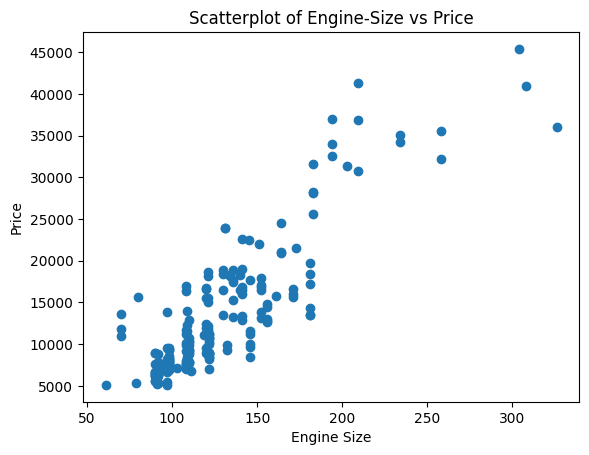

In [146]:
#Analizying linear relationship between price and engine size

import matplotlib.pyplot as plt
x=df["engine-size"]
y=df["price"]
plt.title("Scatterplot of Engine-Size vs Price")
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.scatter(x,y)


In [147]:
#Summarize some categorical data like drive_wheels or body_style
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
body_style_counts = df['body-style'].value_counts().to_frame()
print(body_style_counts)
print(drive_wheels_counts)

             body-style
sedan                96
hatchback            70
wagon                25
hardtop               8
convertible           6
     drive-wheels
fwd           120
rwd            76
4wd             9


In [148]:
#Finding the average price of vehicles and observe how they differ between different types of body styles and drive wheels variables.
df_test = ohe[['drive-wheels','body-style', 'price']]
df_group = df_test.groupby(['drive-wheels','body-style'], as_index=False).mean()
df_group

,drive-wheels,body-style,price
0,4wd,hatchback,15739.0
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.75
3,fwd,convertible,11595.0
4,fwd,hardtop,8249.0
5,fwd,hatchback,8396.387755
6,fwd,sedan,9780.368421
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.6
9,rwd,hardtop,24202.714286


In [149]:
#Create a pivot table to visualize better
df_pivot = df_group.pivot(index='drive-wheels', columns='body-style')
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                 <NA>          <NA>       15739.0  12647.333333   
fwd              11595.0        8249.0   8396.387755   9780.368421   
rwd              23949.6  24202.714286  15235.789474  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd                9095.75  
fwd            9997.333333  
rwd           16994.222222

In [150]:

df['engine-size'].astype('Int32')
df_engine_price=df[['engine-size', 'price']]
df_engine_price.astype(float)
df_engine_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   engine-size  205 non-null    int64
 1   price        205 non-null    Int32
dtypes: Int32(1), int64(1)
memory usage: 2.7 KB


[Text(0.5, 1.0, 'Engine-size vs Price correlation')]

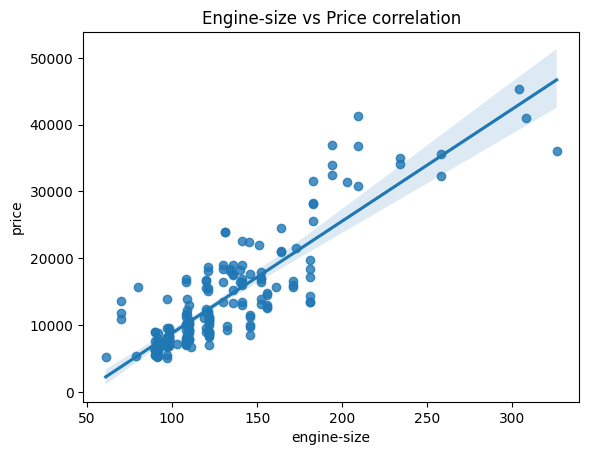

In [151]:
#Check the correlation between engine-size and price
import seaborn as sns
sns.regplot(x="engine-size", y="price", data=df_engine_price.astype('int32')).set(title='Engine-size vs Price correlation')

#there is a positive correlation between engine size and price.

[Text(0.5, 1.0, 'Highway miles per galon vs Price correlation')]

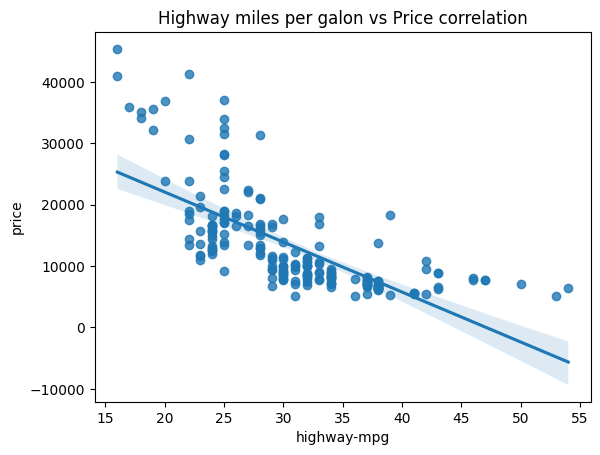

In [152]:
#Check the correlation between highway miles per galon (highway-mpg) and price
df_highway_mpg_price=df[['highway-mpg', 'price']]
sns.regplot(x="highway-mpg", y="price", data=df_highway_mpg_price.astype('int32')).set(title='Highway miles per galon vs Price correlation')

#there is a negative correlation between highway miles per galon and price. Although this relationship is negative the slope of the line is steep
#which means that the highway miles per gallon is still a good predictor of price.

In [153]:
#Check if there are non values in the peak-rpm column
peak_null_values = df.loc[df['peak-rpm'].isna()]
peak_null_values

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,122,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,<NA>,NaN,23,31,9295
131,2,122,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,<NA>,NaN,23,31,9895


In [154]:
#Assign 5500 as peak-rpm for null peak-rpm values
for i in df.index :
  if pd.isnull(df.loc[i, 'peak-rpm']) :
    df.loc[i, 'peak-rpm'] = 5500

#Assign 105 as horsepower for null horsepower values
for i in df.index :
  if pd.isnull(df.loc[i, 'horsepower']) :
    df.loc[i, 'horsepower'] = 105

[Text(0.5, 1.0, 'Peak-rpm vs Price correlation')]

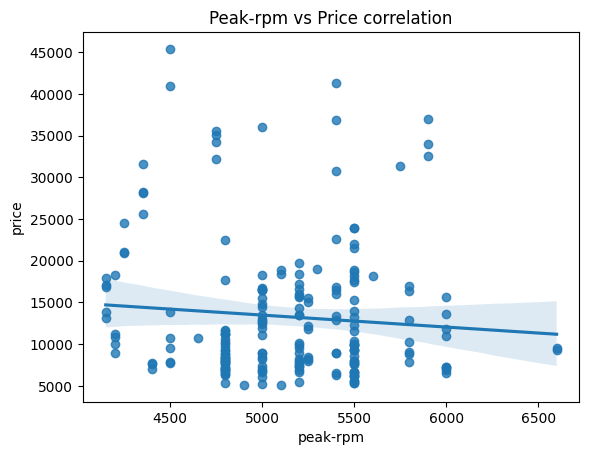

In [155]:
#Check the correlation between peak-rpm and price
df_peak_rpm_price=df[['peak-rpm', 'price']]
sns.regplot(x="peak-rpm", y="price", data=df_peak_rpm_price.astype('int32')).set(title='Peak-rpm vs Price correlation')

#there is a negative correlation between df_peak_rpm_price and price. But both low peak RPM and high values of peak RPM have low and high prices.
#Therefore, I cannot use RPM to predict the values.

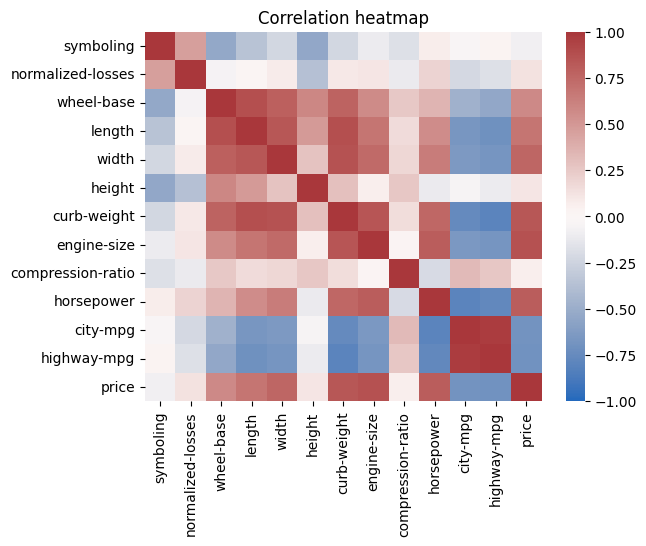

In [156]:
#Create a heatmap to check the correlation between price and all the variables
matrix = df.corr().round(3)
sns.heatmap(matrix, vmax=1, vmin=-1, center=0, cmap='vlag').set(title='Correlation heatmap')
plt.show()

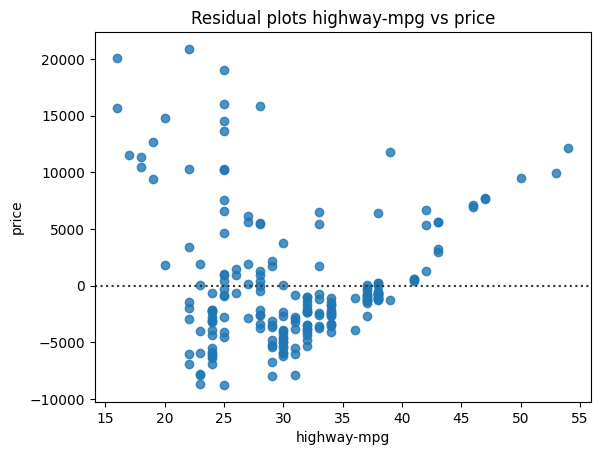

In [157]:
#Create residual plots to check if linear models are appropiate or not
df_residplot = df[['highway-mpg', 'price']].astype('int32')
g = sns.residplot(x="highway-mpg", y="price", data=df_residplot, dropna=True).set(title='Residual plots highway-mpg vs price')



In [158]:
#Residuals have a curvature, so linear assumption could be incorrect. Better it would be a nonlinear function for the model (polynomial).

In [159]:
#Multiple Linear Model Estimator
from sklearn.linear_model import LinearRegression

#Create a Linear Regression Object using the Constructor 
lm = LinearRegression()

#Extract the 4 predict variables  with higher correlation according to the heat map (horsepower, highway-mpg, engine-size, curb-weight) and store them in variable Z
Z = df[['horsepower', 'highway-mpg', 'engine-size', 'curb-weight']]

#Fit the model to find the parameters b0,b1 ...
lm.fit(Z, df['price'])

#Obtain a prediction
Yhat = lm.predict(Z) 

#Get the RMSE (root mean square error) to evaluate the model performance. 

from sklearn.metrics import mean_squared_error
mlr_rmse = np.sqrt(mean_squared_error(df['price'], Yhat))
mlr_rmse



3463.0741931254493

In [160]:
#R² taking into account the four more accurate variables
lm.score(Z, df['price'])

0.8124794025409336

In [161]:
#R² taking into account only the highway-mpg variable
x=df[['highway-mpg']]
y=df['price']
lm.fit(x,y)
lm.score(x,y)

0.4897840278814296

In [162]:
#R² taking into account only the highway-mpg and engine-size variables
x=df[['highway-mpg', 'engine-size']]
y=df['price']
lm.fit(x,y)
lm.score(x,y)

0.7815911560865332

In [163]:
#R² taking into account only the highway-mpg,engine-size and curb-weight variables
x=df[['highway-mpg', 'engine-size', 'curb-weight']]
y=df['price']
lm.fit(x,y)
lm.score(x,y)

0.7949735217970578

In [164]:
#Polynomial regression model with scikit-learn

#1. Determining the degree of the polynomial (2 as first approach just to test)
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree=2, include_bias=False)

X = df[['horsepower', 'curb-weight', 'engine-size']]
Y = df['price']


In [165]:
#2. Creating the new features. Defining the training and the test data
from sklearn.model_selection import train_test_split
x_poly = pr.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(x_poly, Y, test_size=0.3, random_state=42)

In [166]:
#3. Creating the polynomial regression model
poly_reg_model = LinearRegression()

# Fit the model to the training data
poly_reg_model.fit(X_train, Y_train)

y_predicted = poly_reg_model.predict(X_train)


In [167]:
#See how well our model will predict responses based on feature values it hasn’t seen before 
poly_reg_y_predicted = poly_reg_model.predict(X_test)

#Get the RMSE (root mean square error) to evaluate the model performance. RMSE shows how far the values of the model predicts (poly_reg_y_predicted) are from the true values (Y_test), on average
from sklearn.metrics import mean_squared_error

poly_reg_rmse = np.sqrt(mean_squared_error(Y_test, poly_reg_y_predicted))

poly_reg_rmse


3802.71811984595

In [168]:
#We see  that the root mean square error is lower in the multilinear regression than in the 2nd degree polynomial regressin . 
#So I will try to find the best degree in the polynomial regression to check if I get a lower RMSE than the multilinear one.

Rsqu_test = []

order = [1,2,3,4,5]
for n in order :
  pr = PolynomialFeatures(degree=n)
  x_pol = pr.fit_transform(X)
  X_train, X_test, Y_train, Y_test = train_test_split(x_pol, Y, test_size=0.3, random_state=42)
  poly_reg_model = LinearRegression()
  poly_reg_model.fit(X_train, Y_train)
  poly_reg_y_predicted = poly_reg_model.predict(X_test)
  poly_reg_rmse = np.sqrt(mean_squared_error(Y_test, poly_reg_y_predicted))

  Rsqu_test.append(poly_reg_rmse)


Rsqu_test
#The lowest RMSE (Root Mean Square Error) I get with the third degree Polynomial regression.

[3905.299979843989,
 3802.718119842708,
 3351.5463311971694,
 4395.943020498382,
 105540.46725933794]

In [169]:
#Create a linear regression model to compare the performance of the two models: linear vs polynomial regression
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, Y_train)
lin_reg_y_predicted = lin_reg_model.predict(X_test)
lin_reg_rmse = np.sqrt(mean_squared_error(Y_test, lin_reg_y_predicted))
lin_reg_rmse

3905.2999798439887

In [170]:
#Pipeline (another easier way to get the Polynomial model regression)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

Input=[('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2)), ('mode', LinearRegression())] #create a list of tuples with name and models constructors
pipe = Pipeline(Input) #create a pipieline object with the Pipeline Constructor
pipe.fit(df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y) #train the pipeline by applying the train method (.fit()) to the pipeline object
yhat = pipe.predict(df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])



In [171]:
#Evaluate the model numerically 

#Root Mean Square Error(RMSE)
from sklearn.metrics import mean_squared_error
mse = np.sqrt(mean_squared_error(df['price'], yhat))
mse

3110.573643803458